## Advanced Linear Regression Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**Objectives:**

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### 1. Data Understanding and Exploration

Let's load and understand the data first.

In [115]:
# Loading important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [188]:
# Reading the data

housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [117]:
# Checking the number of rows and columns

housing.shape

(1460, 81)

In [118]:
# Checking the column info

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [119]:
# Checking the summary stats

housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [120]:
# Checking null values
round(housing.isnull().sum()/len(housing.index) * 100,2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

We can see that few columns have missing values. Top 4 columns have more than 80% values missing. When we look at the data, we can see that missing values are not blanks actually, they are representing 'NA' value which could mean that the house might not have this feature.

Let's analyse a bit more in detail.

In [189]:
# Replacing null values with appropriate values explicitly for the top 4 columns first which have
# more than 80% such values.

# PoolQC
housing['PoolQC'].fillna('No Pool', inplace=True)

# MiscFeature
housing['MiscFeature'].fillna('None', inplace=True)

# Alley
housing['Alley'].fillna('No Alley', inplace=True)

# Fence
housing['Fence'].fillna('No Fence', inplace=True)

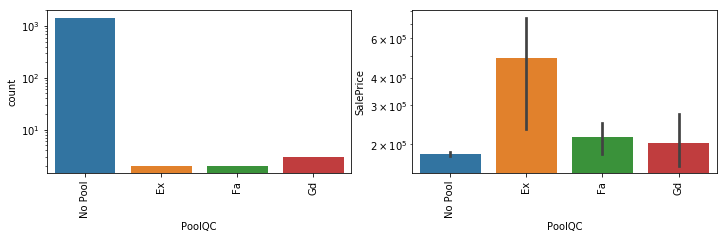

In [122]:
# Analysing 'PoolQC'
plt.figure (figsize=(12,3))
plt.subplot(1, 2, 1), sns.countplot(x='PoolQC', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.subplot(1, 2, 2), sns.barplot(x='PoolQC', y='SalePrice', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.show()

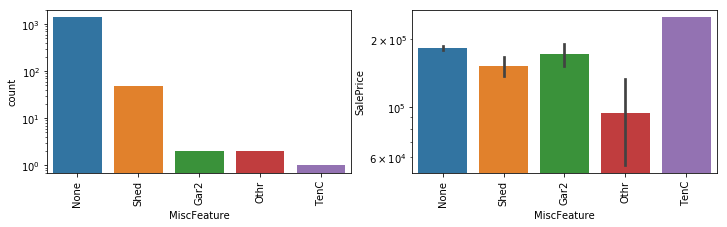

In [123]:
# Analysing 'MiscFeature'
plt.figure (figsize=(12,3))
plt.subplot(1, 2, 1), sns.countplot(x='MiscFeature', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.subplot(1, 2, 2), sns.barplot(x='MiscFeature', y='SalePrice', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.show()

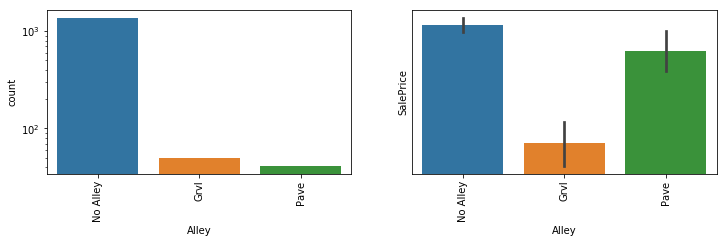

In [124]:
# Analysing 'Alley'
plt.figure (figsize=(12,3))
plt.subplot(1, 2, 1), sns.countplot(x='Alley', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.subplot(1, 2, 2), sns.barplot(x='Alley', y='SalePrice', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.show()

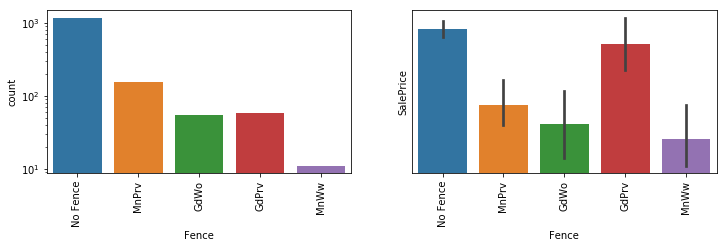

In [125]:
# Analysing 'Fence'
plt.figure (figsize=(12,3))
plt.subplot(1, 2, 1), sns.countplot(x='Fence', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.subplot(1, 2, 2), sns.barplot(x='Fence', y='SalePrice', data=housing), plt.xticks(rotation='vertical'), plt.yscale('log')
plt.show()

**Inference from the above graphs**

PoolQC - Houses with excellent pool quality seem to have higher price.

MiscFeature - Houses with Tennis court are more expensive. But still not much inference.

Alley - No Alley houses look expensive followed by Paved Alley

Fence - Good Privacy(GDPrv) houses look expensive

In [190]:
# Remaining categorical columns with  null values which are actually 'NA' values

# Imputing null value in 'FireplaceQu' with 'No Fireplace' value.
housing['FireplaceQu'].fillna('No Fireplace', inplace=True)

# Imputing null value in garage columns with 'No Garage' value.
garage_cols = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
for col in garage_cols:
    housing[col].fillna('No Garage', inplace=True)

# Imputing null value in basement columns with 'No Basement' value.
bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in bsmt_cols:
    housing[col].fillna('No Basement', inplace=True)

# Imputing null value in 'MasVnrType' with 'None' value.
housing['MasVnrType'].fillna('None', inplace=True)

In [191]:
# Let's check for 'LotFrontage'

housing['LotFrontage'].describe() # the mean is around 70 and median 69

# Let's impute the null values with mean
housing.loc[pd.isnull(housing['LotFrontage']),'LotFrontage'] = housing['LotFrontage'].mean()

# Check null values again
housing['LotFrontage'].isnull().sum()

0

In [192]:
# Let's check 'GarageYrBlt'

housing['GarageYrBlt'].describe()

# Let's impute the missing value with the median
housing.loc[pd.isnull(housing['GarageYrBlt']),'GarageYrBlt'] = housing['GarageYrBlt'].median()

# Check null values again
housing['GarageYrBlt'].isnull().sum()

0

In [193]:
# Let's check for 'MasVnrArea'

housing['MasVnrArea'].describe() # the mean is around 103

# Let's impute the null values with '0' which is the value given corresponding to 'None' in MasVnrType
housing.loc[pd.isnull(housing['MasVnrArea']),'MasVnrArea'] = 0

# Check null values again
housing['MasVnrArea'].isnull().sum()

0

In [194]:
# Dropping rows as 'Electrical' column has just 1 missing value i.e. 1 row.

housing.dropna(inplace=True)

In [131]:
# Checking null values again

round(housing.isnull().sum()/len(housing.index) * 100,2).sort_values(ascending=False)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
YearRemodAdd    0.0
YearBuilt       0.0
OverallCond     0.0
LandContour     0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
               ... 
ScreenPorch     0.0
PoolArea        0.0
PoolQC          0.0
Fence           0.0
MiscFeature     0.0
MiscVal         0.0
MoSold          0.0
YrSold          0.0
SaleType        0.0
GarageCars      0.0
GarageFinish    0.0
GarageYrBlt     0.0
FullBath        0.0
Electrical      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
GrLivArea       0.0
BsmtFullBath    0.0


Now, there seem to be no null values.

Also, there are few columns like YearBuilt- Original Construction Date, YearRemodAdd- Remodel date etc. which have date values and which at present do not make much sense.
Let's try deriving new columns with the difference between the years for e.g. difference between YearBuilt and current year which would show how long back was this house built which inturn could add some insights into our model.

In [195]:
# Deriving new columns as mentioned above

date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for col in date_cols:
    current_year = datetime.datetime.now().year
    housing[col] = current_year - housing[col]

# Renaming the above columns
prefix = 'Years_Since_'
for col in date_cols:
    housing = housing.rename(columns =  {col:prefix + col})

# Checking the column info again
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
Id                          1459 non-null int64
MSSubClass                  1459 non-null int64
MSZoning                    1459 non-null object
LotFrontage                 1459 non-null float64
LotArea                     1459 non-null int64
Street                      1459 non-null object
Alley                       1459 non-null object
LotShape                    1459 non-null object
LandContour                 1459 non-null object
Utilities                   1459 non-null object
LotConfig                   1459 non-null object
LandSlope                   1459 non-null object
Neighborhood                1459 non-null object
Condition1                  1459 non-null object
Condition2                  1459 non-null object
BldgType                    1459 non-null object
HouseStyle                  1459 non-null object
OverallQual                 1459 non-null int64
OverallCond   

In [196]:
# Seperating categorical and numeric variables

# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

# categorical variables
housing_catg = housing.select_dtypes(exclude=['float64', 'int64'])

### 2. Data Visualization

**Visualizing numeric variables**

In [197]:
# dropping ID column
housing_numeric = housing_numeric.drop(['Id'], axis=1)
housing_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0          60         65.0     8450            7            5   
1          20         80.0     9600            6            8   
2          60         68.0    11250            7            5   
3          70         60.0     9550            7            5   
4          60         84.0    14260            8            5   

   Years_Since_YearBuilt  Years_Since_YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0                     16                        16       196.0         706   
1                     43                        43         0.0         978   
2                     18                        17       162.0         486   
3                    104                        49         0.0         216   
4                     19                        19       350.0         655   

   BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0  ...           0           61              0          0   
1           0  ...         298            0              0          0   
2           0  ...           0           42              0          0   
3           0  ...           0           35            272          0   
4           0  ...         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  Years_Since_YrSold  SalePrice  
0            0         0        0       2                  11     208500  
1            0         0        0       5                  12     181500  
2            0         0        0       9                  11     223500  
3            0         0        0       2                  13     140000  
4            0         0        0      12                  11     250000  

[5 rows x 37 columns]

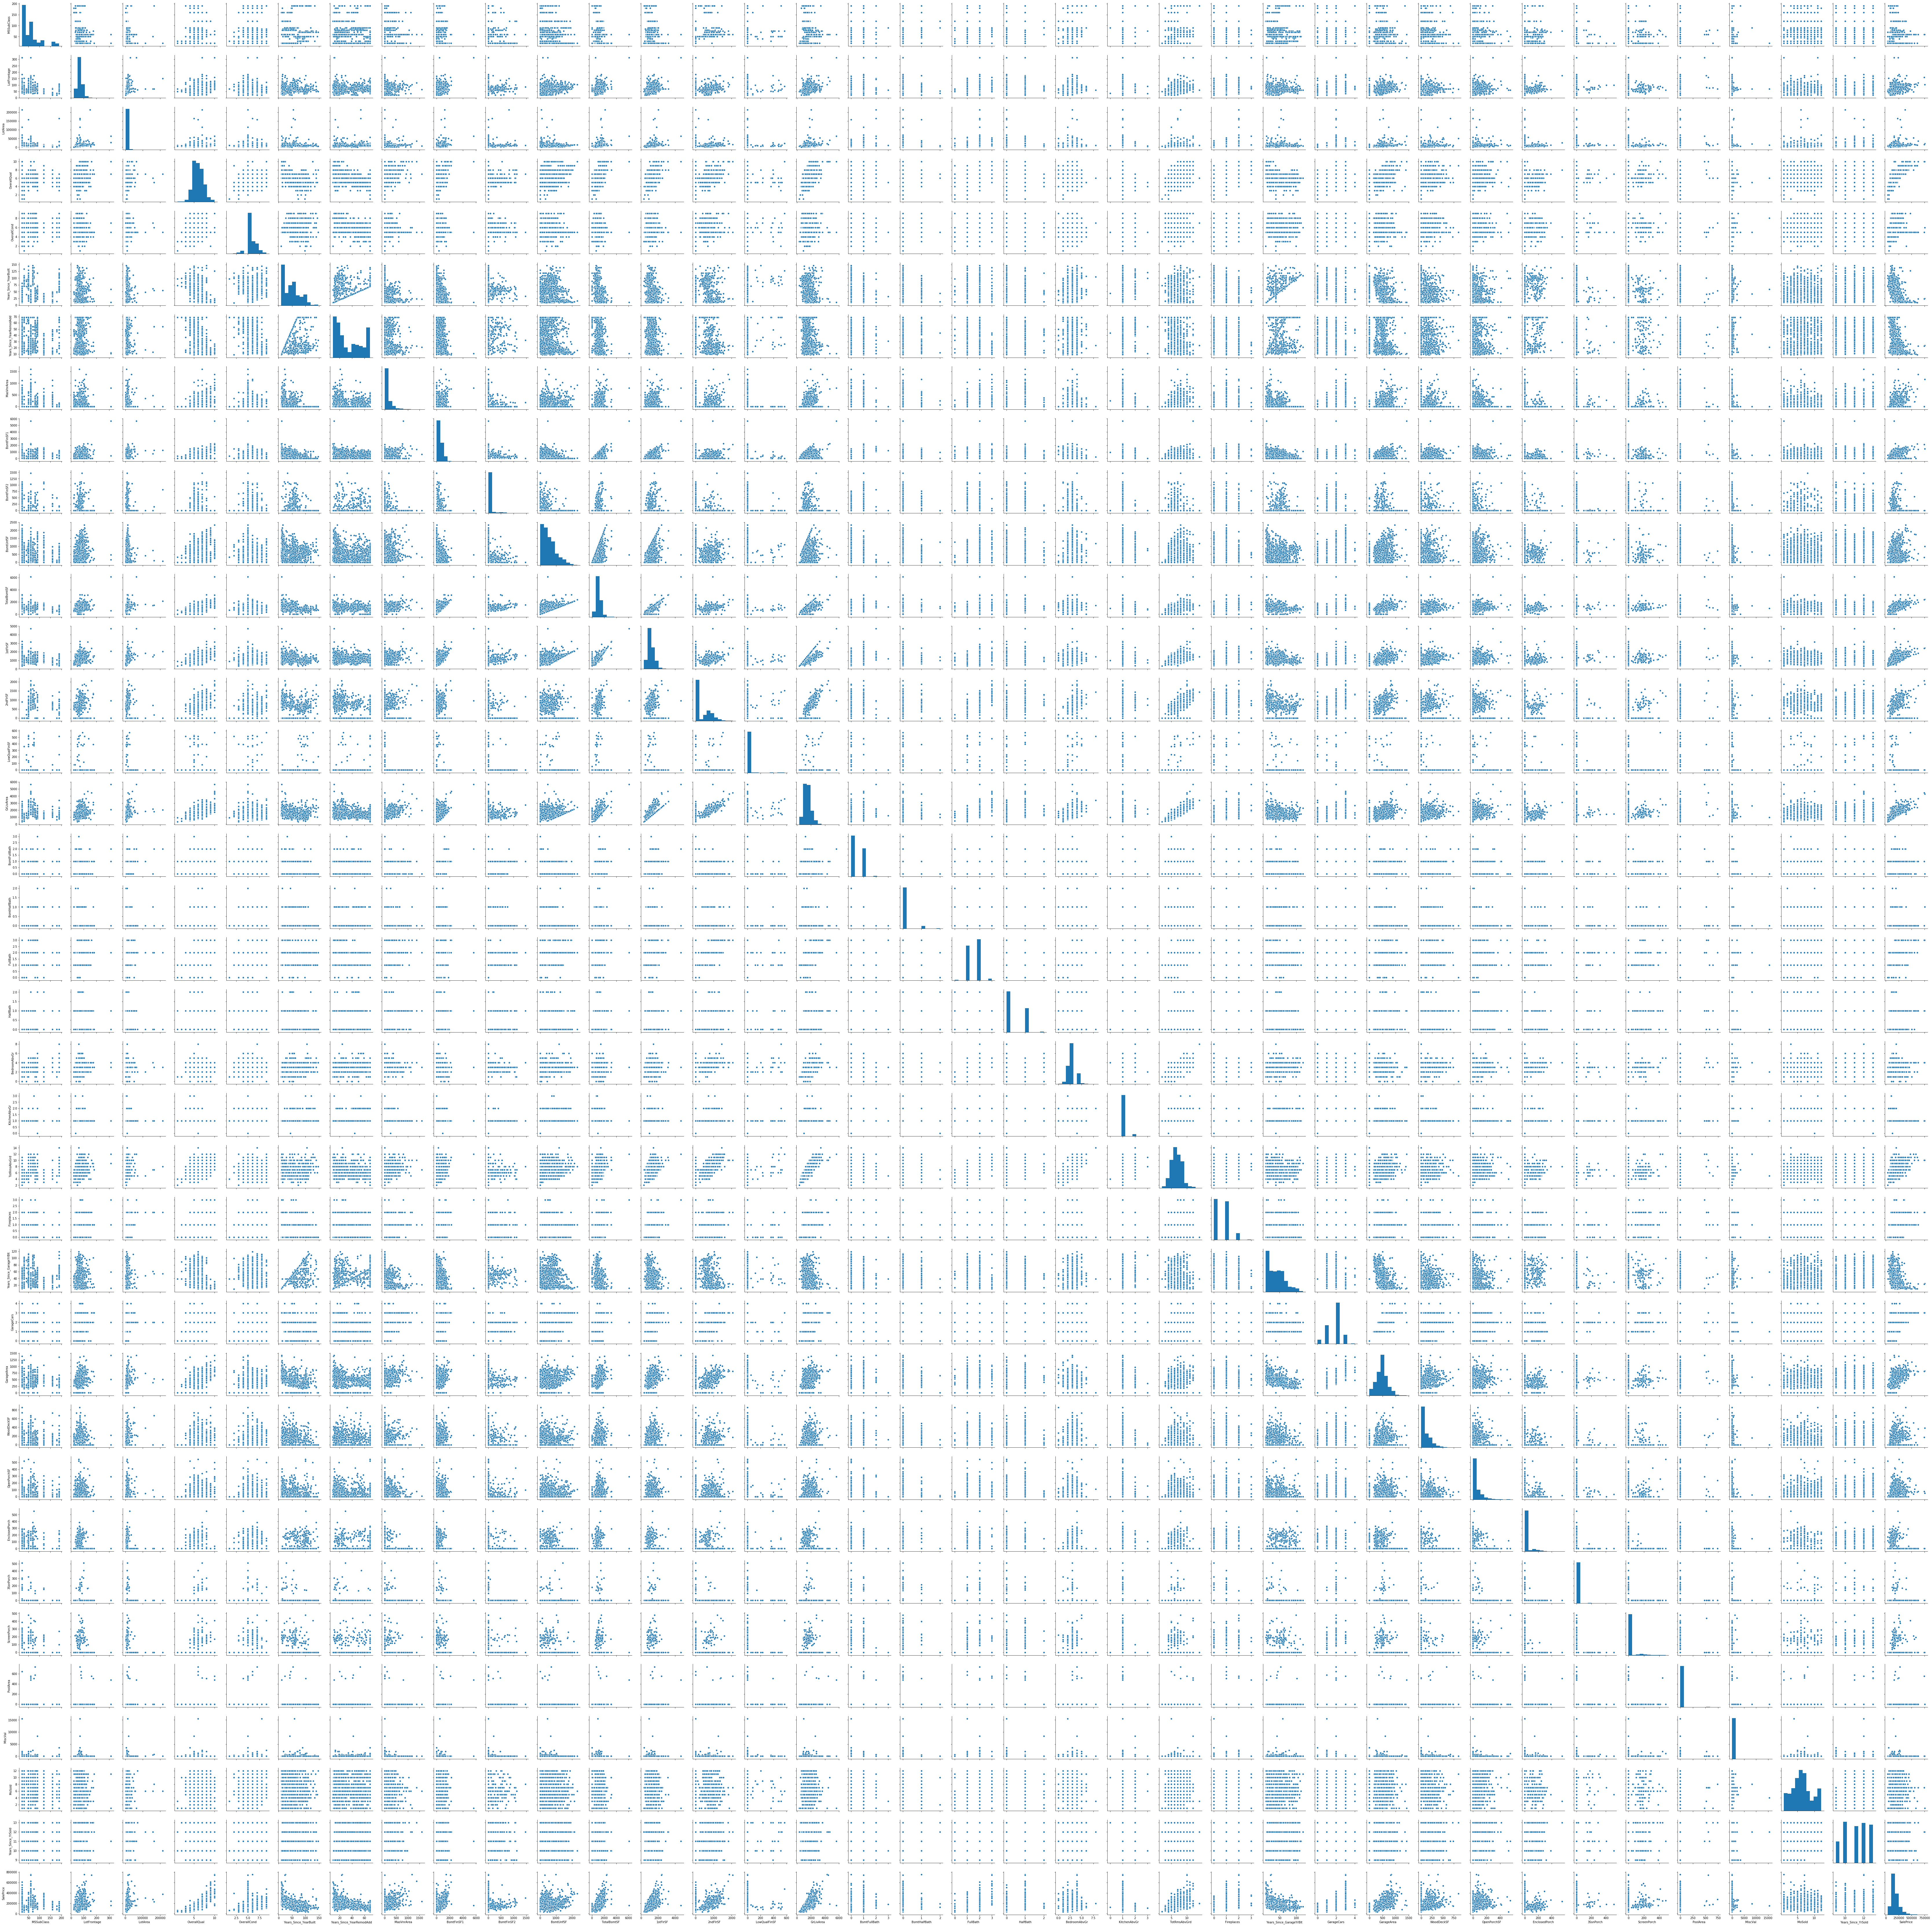

In [15]:
# pairwise scatter plot
sns.pairplot(housing_numeric)
plt.show()

In [135]:
# correlation matrix
cor = housing_numeric.corr()
cor.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass     1.000000    -0.357145 -0.139766     0.032936    -0.059134   
LotFrontage   -0.357145     1.000000  0.306804     0.234321    -0.052778   
LotArea       -0.139766     0.306804  1.000000     0.105786    -0.005665   
OverallQual    0.032936     0.234321  0.105786     1.000000    -0.092243   
OverallCond   -0.059134    -0.052778 -0.005665    -0.092243     1.000000   

             Years_Since_YearBuilt  Years_Since_YearRemodAdd  MasVnrArea  \
MSSubClass               -0.027435                 -0.040199    0.023792   
LotFrontage              -0.117546                 -0.082680    0.178773   
LotArea                  -0.014296                 -0.013852    0.103302   
OverallQual              -0.573334                 -0.551605    0.407075   
OverallCond               0.375780                 -0.074158   -0.125922   

             BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
MSSubClass    -0.069501   -0.065549  ...   -0.012598    -0.005838   
LotFrontage    0.215989    0.043368  ...    0.077103     0.137543   
LotArea        0.214121    0.111158  ...    0.171701     0.084751   
OverallQual    0.239265   -0.059291  ...    0.239000     0.308554   
OverallCond   -0.046595    0.040132  ...   -0.003318    -0.032847   

             EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
MSSubClass       -0.011904  -0.043786    -0.025932  0.008309 -0.007651   
LotFrontage       0.009824   0.062347     0.037710  0.180875  0.001176   
LotArea          -0.018360   0.020417     0.043147  0.077669  0.038063   
OverallQual      -0.114162   0.030314     0.064755  0.065143 -0.031461   
OverallCond       0.070238   0.025465     0.054721 -0.002009  0.068752   

               MoSold  Years_Since_YrSold  SalePrice  
MSSubClass  -0.013404            0.021461  -0.084230  
LotFrontage  0.010204           -0.006756   0.334922  
LotArea      0.001179            0.014254   0.263837  
OverallQual  0.070570            0.027277   0.791069  
OverallCond -0.003685           -0.044003  -0.077924  

[5 rows x 37 columns]

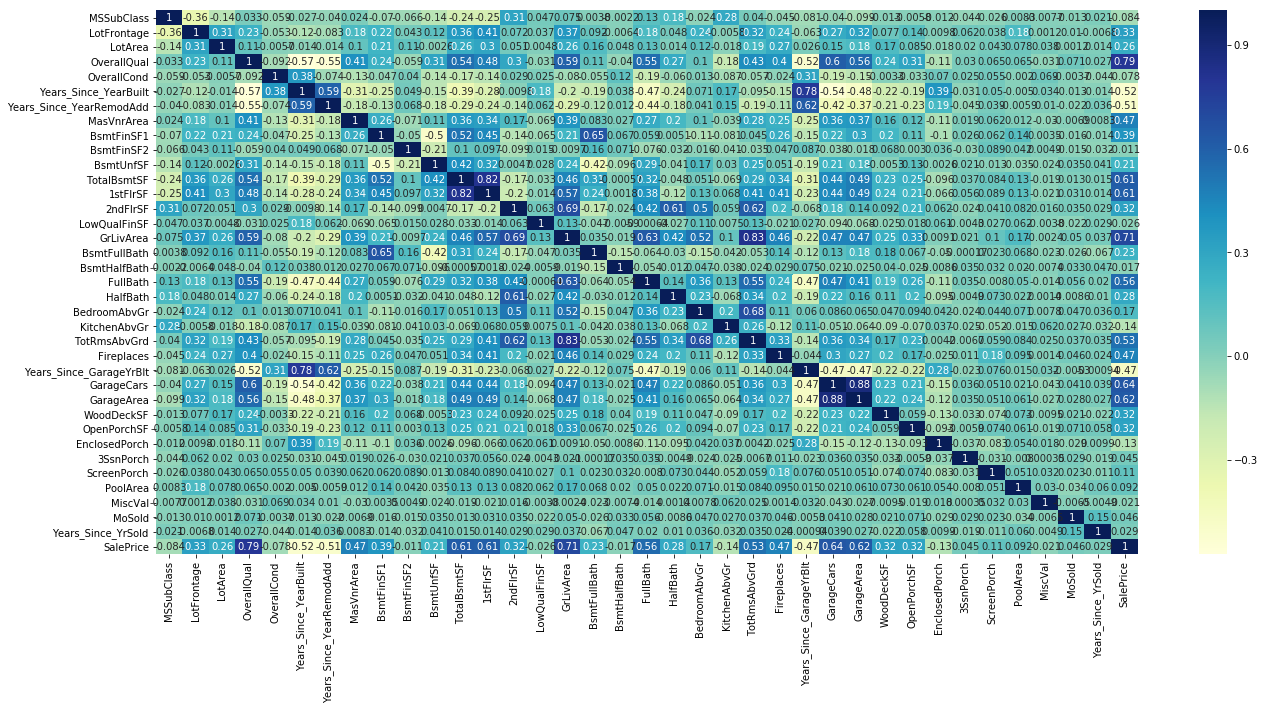

In [136]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(22,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

**Inference from the above heatmap**

Correlation of SalePrice with independent variables:

* Variables having strong positive correlation with SalesPrice : OverallQual, TotalBasementSF, 1stFlrSF, GrLivArea, FullBath, TotalRumsAbvGrd, GarageCars, GarageArea
* Variables having strong negative correlation with SalesPrice : Years_Since_YearBuilt, Years_Since_YearRemodAdd, Years_Since_GarageYrBlt

Correlation among independent variables:

* Many independent variables seem to be highly correlated(positive) like Years_Since_YearBuilt and Years_Since_GarageYrBlt, GarageArea and GarageCars,TotRmsAbvGrd and GrLivArea etc.

Few variables with very less correlation with SalePrice variable:

* MSSubClass, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Years_Since_YrSold out of which MSSubClass and BsmtHalfBath look like categorical variables.

**Visualising Categorical Variables**

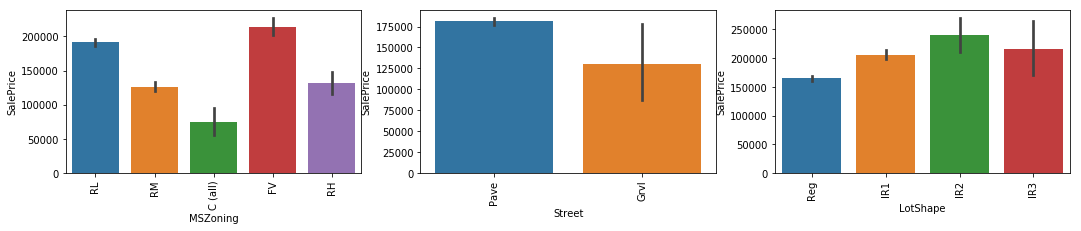

In [137]:
# Columns: MSZoning, Street & LotShape
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='MSZoning',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Street',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='LotShape',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

MSZoning - FV has the highest saleprice and Commercial(C) being the least priced.

Street - Pave seems to have higher SalePrice.

LotShape - IR2 seems to have higher price, still not much of a difference exists between different categories.

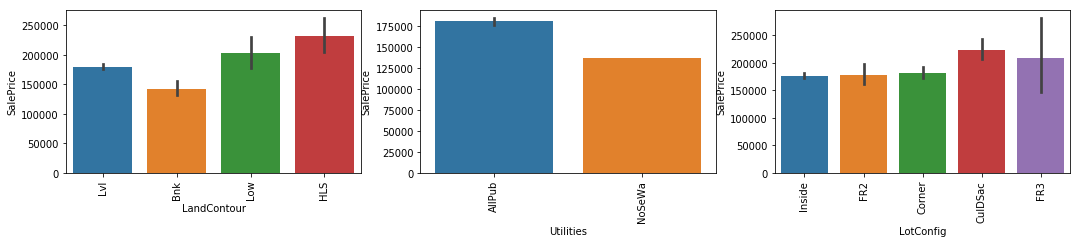

In [138]:
# Columns: LandContour, Utilities & LotConfig
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='LandContour',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Utilities',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='LotConfig',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

LandContour - HLS(Hillside) properties are expensive followed closely by Low(Near flat/level) properties.Still the difference is not much amongst different values.

Utilities - Properties with all public utilities have higher SalePrice.

LotConfig - No specific inference

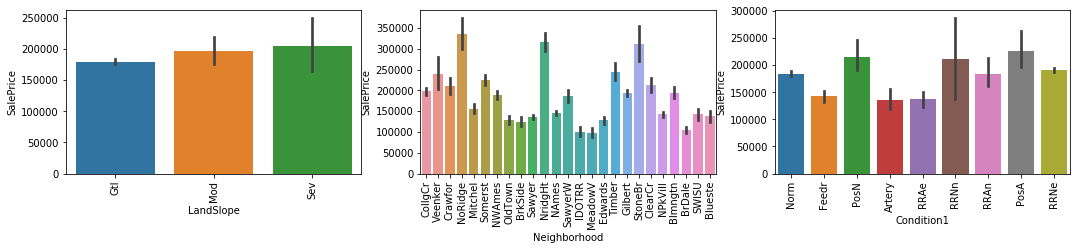

In [139]:
# Columns: LandSlope, Neighborhood & Condition1
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='LandSlope',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Neighborhood',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='Condition1',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

LandSlope - Nothing much

Neighborhood - Properties near NoRidge(Northridge), NridgHt(Northridge Heights) and StoneBr(Stone Brook) have higher saleprice.

Condition1 - PosA(Adjacent to postive off-site feature) and RRNn(Within 200' of North-South Railroad) have higher saleprice.

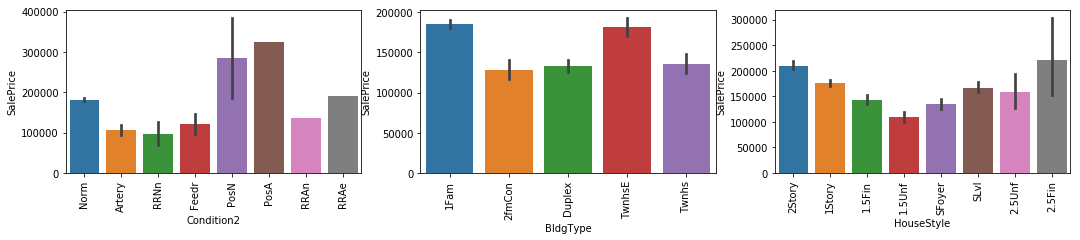

In [140]:
# Columns: Condition2, BldgType & HouseStyle
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='Condition2',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='BldgType',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='HouseStyle',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

Condition2 - PosA and PosN have higher saleprice.

BldgType - 1Fam(Single-family Detached) and TwnhsE(Townhouse End Unit) are expesnive, still not much difference in there.

HouseStyle - 2Story(Two story) and 2.5Unf(Two and one-half story: 2nd level unfinished) have higher saleprice whereas 1.5Unf(One and one-half story: 2nd level unfinished) has the lowest saleprice.

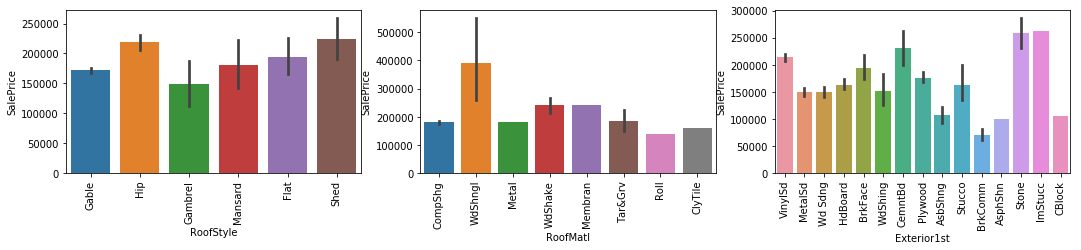

In [141]:
# Columns: RoofStyle, RoofMatl & Exterior1st
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='RoofStyle',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='RoofMatl',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='Exterior1st',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

RoofStyle - Nothing much. Hip and Shed have higher price whereas Gambrel has the lowest.

RoofMatl - WdShngl(Wood Shingles) more expensive and Roll is the least priced.

Exterior1st - Stone, ImStucc(Imitation Stucco) and CemntBd(Cement Board) have higher saleprice whereas BrkComm(Brick Common) is the lowest.

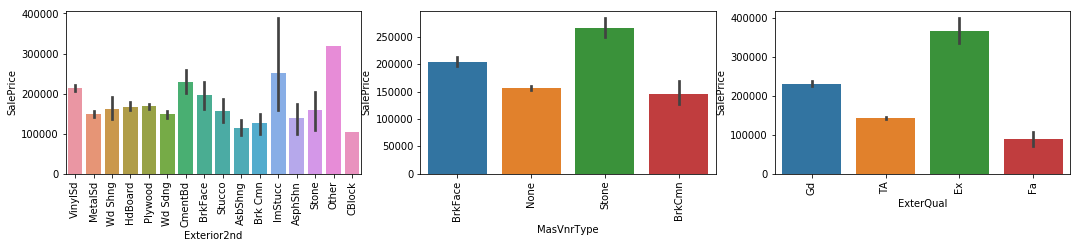

In [142]:
# Columns: Exterior2nd, MasVnrType & ExterQual
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='Exterior2nd',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='MasVnrType',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='ExterQual',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

Exterior2nd - Nothing much. Other coverings are more expensive.

MasVnrType - Stone more expensive.

ExterQual - Ex(Excellent) have higher saleprice whereas Fa(Fair) is the lowest.

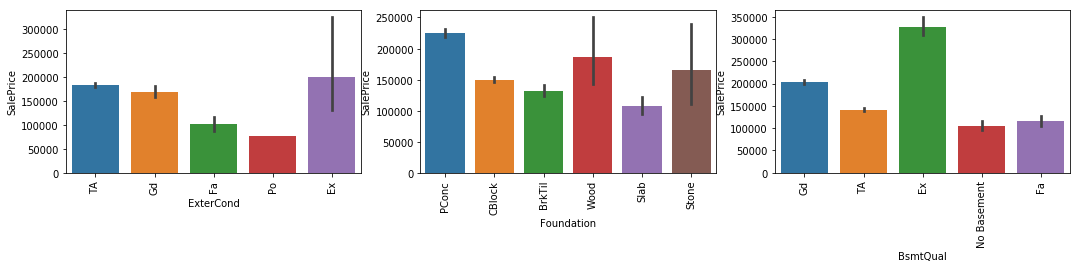

In [143]:
# Columns: ExterCond, Foundation & BsmtQual
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='ExterCond',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Foundation',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='BsmtQual',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

ExterCond - Nothing much. Ex(Excellent) condition houses are more expensive.

Foundation - PConc(Poured Contrete) more expensive followed by wood and stone. Slab is least expensive.

ExterQual - Ex(Excellent (100+ inches)) expensive.

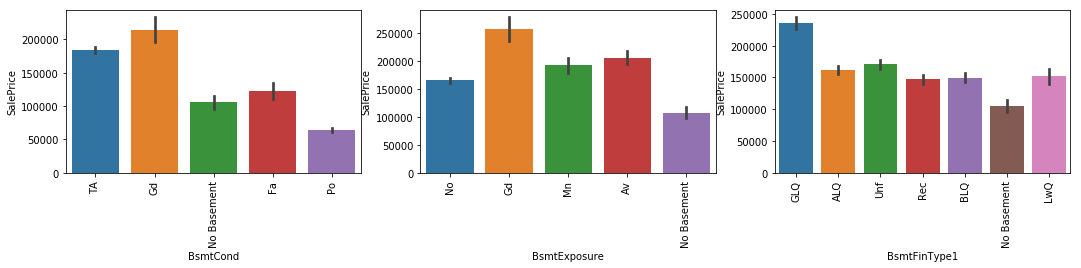

In [144]:
# Columns: BsmtCond, BsmtExposure & BsmtFinType1
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='BsmtCond',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='BsmtExposure',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='BsmtFinType1',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

BsmtCond - Houses with Gd(Good) condition basements are more expensive.

BsmtExposure - Gd(Good Exposure) more expensive and no basments(NA) houses are least expensive.

BsmtFinType1 - GLQ(Good Living Quarters) more expensive.

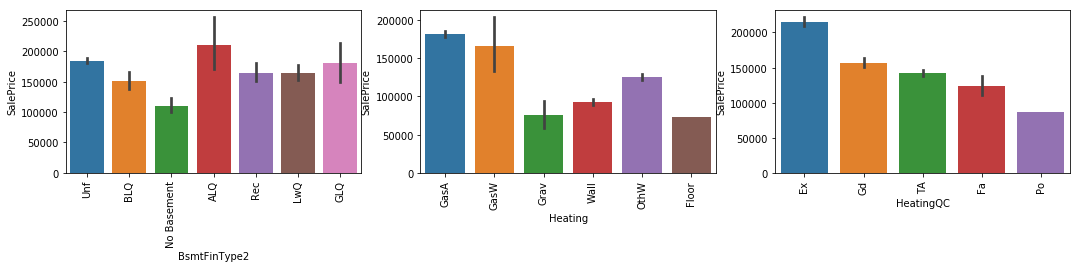

In [145]:
# Columns: BsmtFinType2, Heating & HeatingQC
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='BsmtFinType2',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Heating',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='HeatingQC',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

BsmtFinType2 - ALQ(Average Living Quarters) are more expensive.

Heating - GasA(Gas forced warm air furnace) has highest saleprice followed by GasW(Gas hot water or steam heat). Grav(Gravity furnace) is the least priced.

HeatingQC - Ex(Excellent) is more expensive.

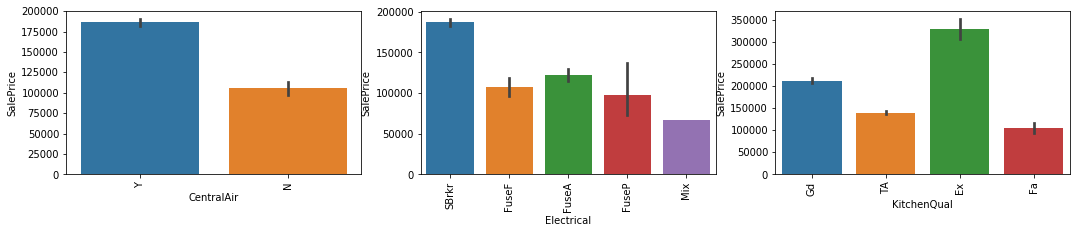

In [146]:
# Columns: CentralAir, Electrical & KitchenQual
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='CentralAir',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='Electrical',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='KitchenQual',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

CentralAir - Houses have a higher price when they have central AC.

Electrical - SBrkr(Standard Circuit Breakers & Romex) have higher saleprice.

KitchenQual - Ex(Excellent) is more expensive.

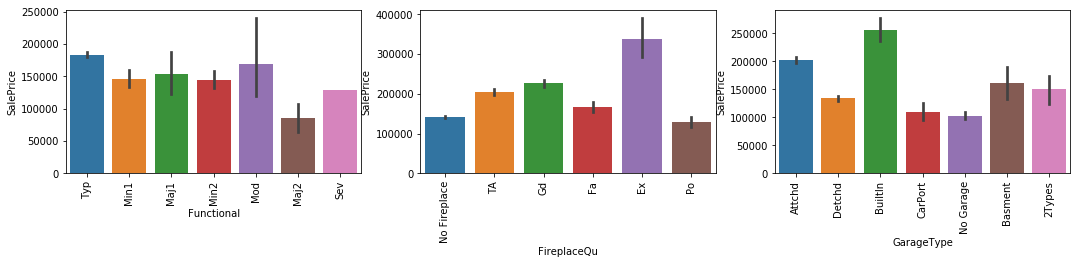

In [147]:
# Columns: Functional, FireplaceQu & GarageType
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='Functional',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='FireplaceQu',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='GarageType',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

Functional - Houses with typical functionality or moderate deductions have higher price. Otherwise, no specific inference.

FireplaceQu - Houses with Ex(Excellent) fireplace quality have higher price and houses with Fa(Fair), Po(Poor) fireplace quality or not having a fireplace are low priced.

GarageType - Houses with BuiltIn garage are expensive and houses with no garage are least priced.

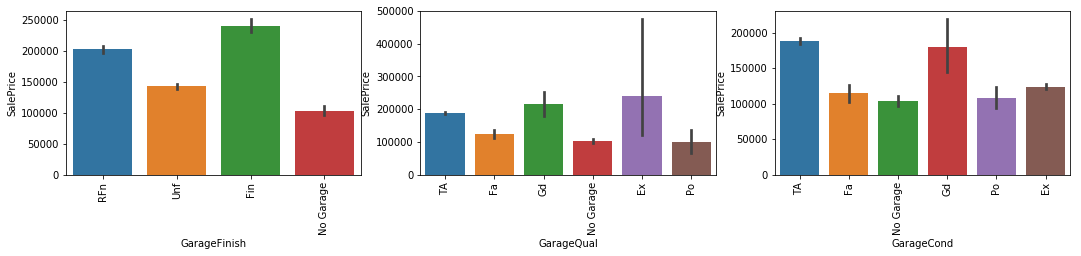

In [148]:
# Columns: GarageFinish, GarageQual & GarageCond
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='GarageFinish',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='GarageQual',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='GarageCond',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

GarageFinish - Houses with Fin(finished) garage have higher price.

GarageQual - Houses with Ex(Excellent) garage quality have higher price and houses with Fa(Fair), Po(Poor) garage quality or not having a garage(NA) are low priced.

GarageCond - Houses with Gd(Good) or TA(Typical/Average) garage condition are expensive and houses with no garage are least priced.

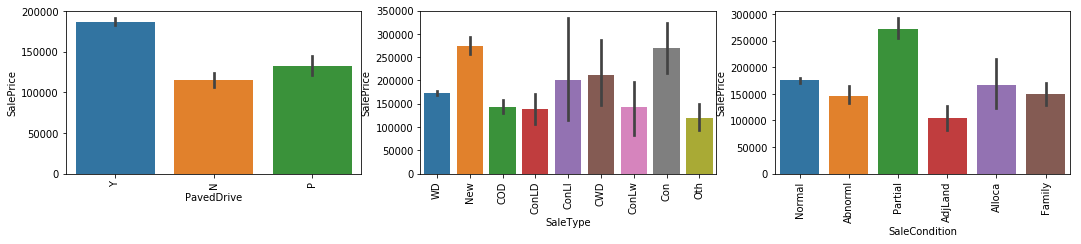

In [149]:
# Columns: PavedDrive, SaleType & SaleCondition
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='PavedDrive',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='SaleType',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='SaleCondition',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

PavedDrive - Houses with PavedDrive have higher price.

SaleType - New houses and Con(Contract 15% Down payment regular terms) have higher price.

SaleCondition - Partial is more expensive.

There are few numeric columns which are actually categorical in nature('MSSubClass', 'OverallQual','MiscVal' etc) & date columns like Mo_Sold, Years_Since_YrSold. 

Let's visualise such columns and see.

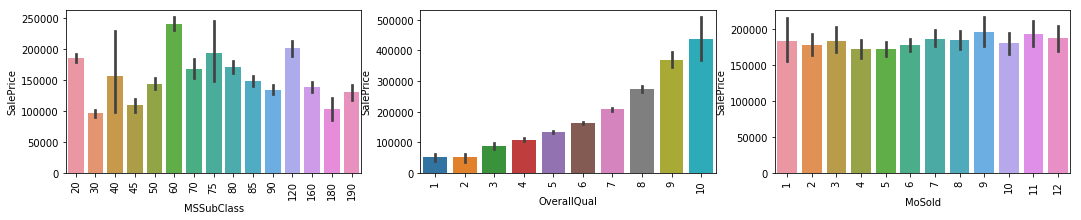

In [150]:
# Columns: MSSubClass, OverallQual & MoSold
plt.figure (figsize=(18,3))
plt.subplot(1, 3, 1), sns.barplot(x='MSSubClass',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.subplot(1, 3, 2), sns.barplot(x='OverallQual',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.subplot(1, 3, 3), sns.barplot(x='MoSold',y='SalePrice',data=housing), plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

MSSubClass - Higher SalePrice for MSSubClass 60(2-STORY 1946 & NEWER).

OverallQual - The SalePrice increases positively with the quality which looks like rating on a scale of 1-10. 10 being the highest.

MoSold - Nothing much

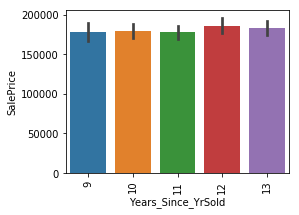

In [151]:
# Columns: Years_Since_YrSold
plt.figure (figsize=(4,3))
plt.subplot(1, 1, 1), sns.barplot(x='Years_Since_YrSold',y='SalePrice',data=housing) , plt.xticks(rotation='vertical')
plt.show()

**Inference from the above graph**

Years_Since_YrSold - Nothing much

### 3. Data Preparation

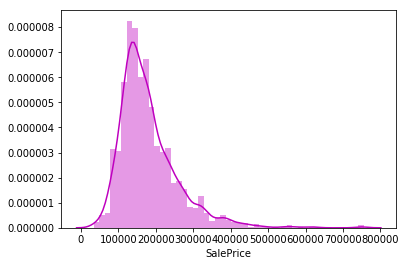

In [198]:
# Check the distribution of target variable (SalePrice)

sns.distplot(housing['SalePrice'],color="m")
plt.show()

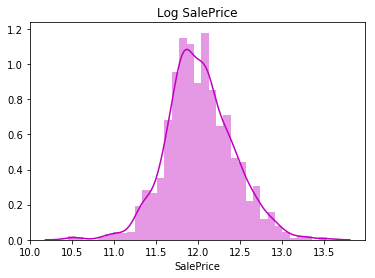

In [199]:
# It looks right-skewed, so let's normalize target variable by applying log transformation

housing['SalePrice'] = np.log1p(housing['SalePrice'])
plt.title('Log SalePrice')
sns.distplot(housing['SalePrice'],color="m")
plt.show()

Now, SalePrice variable looks normally distributed.

**Outlier Detection**

Excluding 'MSSubClass', 'OverallQual', 'Years_Since_YearBuilt', 'Years_Since_YearRemodAdd', 'MoSold',
'Years_Since_YrSold', 'Years_Since_GarageYrBlt', as they look like categorical columns and year columns. 

Also, excluding certain numeric values which basically represent count like BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath'.

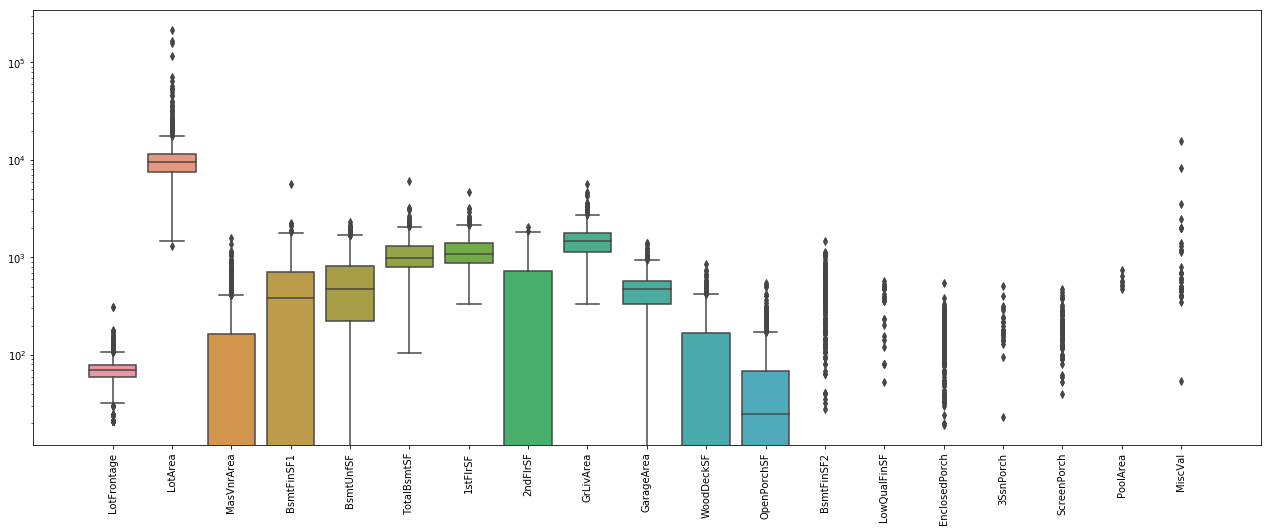

In [200]:
# Checking for outliers in numeric variables

num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
            'OpenPorchSF', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal']
plt.figure(figsize=(22,8))
sns.boxplot(data=housing.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

From the above graph, all variables seem to have outliers. Few variables look highly skewed like BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea and MiscVal.

Let's do some analysis on these variables.

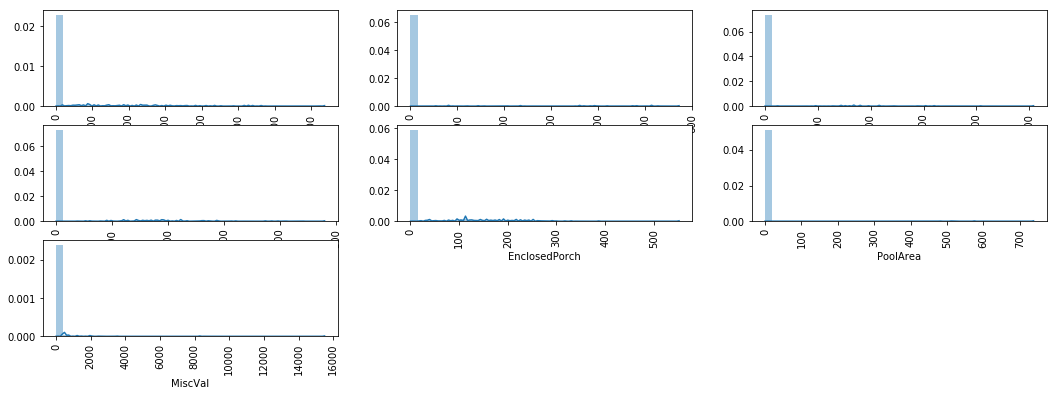

In [201]:
# Columns: BsmtFinSF2, LowQualFinSF, 3SsnPorch, ScreenPorch, EnclosedPorch, PoolArea & MiscVal
plt.figure (figsize=(18,6))
plt.subplot(3, 3, 1), sns.distplot(housing['BsmtFinSF2']), plt.xticks(rotation='vertical')
plt.subplot(3, 3, 2), sns.distplot(housing['LowQualFinSF']) , plt.xticks(rotation='vertical')
plt.subplot(3, 3, 3), sns.distplot(housing['3SsnPorch']), plt.xticks(rotation='vertical')
plt.subplot(3, 3, 4), sns.distplot(housing['ScreenPorch']), plt.xticks(rotation='vertical')
plt.subplot(3, 3, 5), sns.distplot(housing['EnclosedPorch']), plt.xticks(rotation='vertical')
plt.subplot(3, 3, 6), sns.distplot(housing['PoolArea']), plt.xticks(rotation='vertical')
plt.subplot(3, 3, 7), sns.distplot(housing['MiscVal']), plt.xticks(rotation='vertical')
plt.show()

We can clearly see from the above graphs that these variables are highly skewed and the prominent value is '0'. Also, when we look at their correlation with SalePrice variable, it's quite low.

Hence, we can go ahead and drop all these variables.

In [202]:
# dropping the above mentioned columns

housing = housing.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)

In [203]:
#Let's do outlier treatment for remaining columns

outlier_cols = list(num_cols).copy()
outlier_cols.remove('BsmtFinSF2')
outlier_cols.remove('LowQualFinSF')
outlier_cols.remove('EnclosedPorch')
outlier_cols.remove('3SsnPorch')
outlier_cols.remove('ScreenPorch')
outlier_cols.remove('PoolArea')
outlier_cols.remove('MiscVal')

In [204]:
#Capping the outlier values which are above 95% with the value at 95% and values below 5% with value at
#5%

for col in outlier_cols:
    percentiles = housing[col].quantile([0.05,0.95]).values
    housing.loc[housing[col] <= percentiles[0],col] = percentiles[0]
    housing.loc[housing[col] >= percentiles[1],col] = percentiles[1]

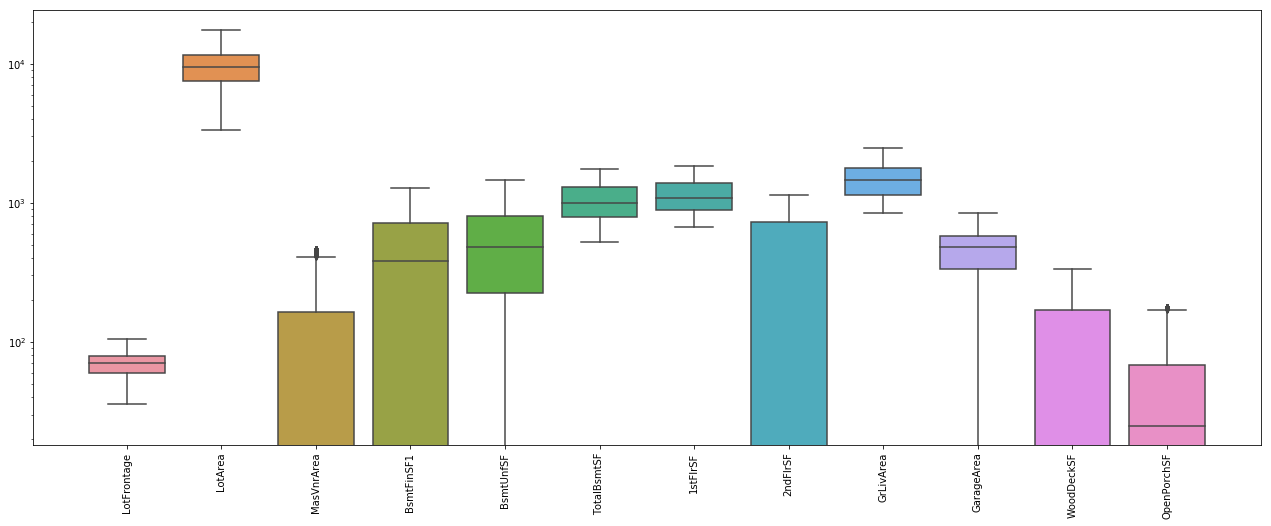

In [159]:
# Checking for outliers in numeric variables again

num_cols = outlier_cols
plt.figure(figsize=(22,8))
sns.boxplot(data=housing.loc[:,num_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

So now, the variables look fine.

In [205]:
# List of variables to convert to numeric values using LabelEncoder

le = LabelEncoder()

col_toencode = ['CentralAir', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
               'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']

for col in col_toencode:
    housing[col] = le.fit_transform(housing[col])

In [206]:
# Creating dummy variables for categorical variables

cols_todummy = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                'Heating', 'Functional', 'GarageType', 'PavedDrive', 'SaleType',
                'SaleCondition', 'MiscFeature', 'Fence', 'Electrical']

for col in cols_todummy:
    housing_dummy = pd.get_dummies(housing[col], prefix = col, drop_first=True)
    housing = pd.concat([housing, housing_dummy], axis=1)

In [207]:
# Dropping the columns for which dummy variables have been created

for col in cols_todummy:
    housing = housing.drop(col,axis=1)

In [208]:
# Checking the data again

housing.head(2)

Id  MSSubClass  LotFrontage  LotArea  LandSlope  OverallQual  OverallCond  \
0   1          60         65.0   8450.0          0            7            5   
1   2          20         80.0   9600.0          0            6            8   

   Years_Since_YearBuilt  Years_Since_YearRemodAdd  MasVnrArea  ...  \
0                     16                        16       196.0  ...   
1                     43                        43         0.0  ...   

   MiscFeature_Shed  MiscFeature_TenC  Fence_GdWo  Fence_MnPrv  Fence_MnWw  \
0                 0                 0           0            0           0   
1                 0                 0           0            0           0   

   Fence_No Fence  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0               1                 0                 0               0   
1               1                 0                 0               0   

   Electrical_SBrkr  
0                 1  
1                 1  

[2 rows x 208 columns]

In [164]:
# Checking the shape

housing.shape

(1459, 208)

### Test-Train split

In [209]:
# Avoiding 'Id' variable

cols = [col for col in housing.columns if col not in ['Id']]
housing = housing[cols]

In [210]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
train_df, test_df = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

In [211]:
scaler = StandardScaler()

cols_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'Years_Since_YearBuilt', 
                'Years_Since_YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'Years_Since_GarageYrBlt', 'GarageCars', 'GarageArea',
                'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Years_Since_YrSold', 'CentralAir', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
               'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']

# scaling train dataset
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

# scaling test dataset
test_df[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

#### Splitting into X and y sets for Model Building

In [212]:
# train
y_train = train_df.pop('SalePrice')
X_train = train_df

# test
y_test = test_df.pop('SalePrice')
X_test = test_df

### 4. Model Building and Evaluation

In [213]:
# Linear Regression

lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Train r2 score: {0}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Train mse: {0}".format(mean_squared_error(y_true=y_train, y_pred=y_train_pred)))

Train r2 score: 0.9505689519859938
Train mse: 0.008075461519935656


In [214]:
# Test scores
y_test_pred = lm.predict(X_test)
print("Test r2 score: {0}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Test mse: {0}".format(mean_squared_error(y_true=y_test, y_pred=y_test_pred)))

Test r2 score: -7.737066081062558e+22
Test mse: 1.164486300436865e+22


The model's performance looks quite bad on test dataset with just linear regression. It shows the presence of too many variables which is maybe causing the model to overfit. Let's go ahead and apply regularization techiques like Ridge and Lasso regression and decide which would be our final model.

#### Ridge Regression

In [215]:
# list of alphas to tune

params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [216]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.019588  3.553601e-03         0.003399    4.893583e-04      0.0001   
1       0.018788  1.165362e-03         0.003198    4.001384e-04       0.001   
2       0.019589  2.414177e-03         0.002599    4.901165e-04        0.01   
3       0.018989  8.920806e-07         0.002999    9.725608e-07        0.05   
4       0.017990  3.630424e-03         0.002998    8.940433e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.085650          -0.099738          -0.108525   
1   {'alpha': 0.001}          -0.085600          -0.099620          -0.108409   
2    {'alpha': 0.01}          -0.085169          -0.098575          -0.107367   
3    {'alpha': 0.05}          -0.084692          -0.095634          -0.104564   
4     {'alpha': 0.1}          -0.084540          -0.093632          -0.102831   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087403  ...        -0.093892        0.008841               27   
1          -0.087377  ...        -0.093841        0.008794               26   
2          -0.087132  ...        -0.093381        0.008378               25   
3          -0.086435  ...        -0.092245        0.007203               23   
4          -0.085914  ...        -0.091477        0.006536               22   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.063262           -0.060359           -0.059048   
1           -0.063282           -0.060377           -0.059053   
2           -0.063466           -0.060558           -0.059129   
3           -0.064133           -0.061353           -0.059598   
4           -0.064716           -0.062097           -0.060068   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.063916           -0.061993         -0.061716         0.001804  
1           -0.063919           -0.062011         -0.061728         0.001804  
2           -0.063954           -0.062204         -0.061862         0.001802  
3           -0.064087           -0.062943         -0.062422         0.001737  
4           -0.064237           -0.063542         -0.062932         0.001683  

[5 rows x 21 columns]

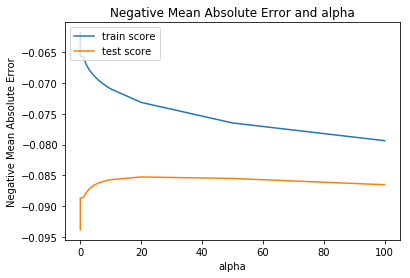

In [217]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

alpha=15 looks like an optimum value. Let's try with this value.

In [218]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00979684,  0.00468575,  0.02816225,  0.00604151,  0.06767791,
        0.04978012, -0.03668001, -0.01773449,  0.00290895, -0.00506687,
        0.00977044, -0.0156088 ,  0.00137537, -0.00326674, -0.00926592,
        0.02226095,  0.00143646, -0.00931365,  0.0650766 , -0.01290795,
        0.01890967,  0.02163808,  0.03827107,  0.07844213,  0.01335363,
       -0.00098333,  0.01772178,  0.01167236, -0.00173304, -0.01815863,
       -0.01085495,  0.01172979,  0.01314939, -0.00354643,  0.00312189,
       -0.00515433,  0.02346246,  0.01141356,  0.00541626,  0.00141717,
        0.01006428,  0.00394118, -0.00281162, -0.00174151,  0.00610057,
        0.04733265,  0.03258354,  0.03948339,  0.014896  ,  0.02327143,
       -0.00044396,  0.02805613,  0.00451897, -0.03939074,  0.00323995,
        0.03678779,  0.01976854,  0.01828427, -0.00640508,  0.02183217,
       -0.02027764, -0.01299344, -0.00308845,  0.00175192, -0.01734544,
        0.02395308,  0.03659581, -0.00913036,  0.0685034 , -0.06

In [219]:
# predict
y_train_pred = ridge.predict(X_train)
print('Train score: {0}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('Test score: {0}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train score: 0.9287436508544609
Test score: 0.8903498626755122


In [220]:
# Let's check the ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.741),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.005),
 ('LotArea', 0.028),
 ('LandSlope', 0.006),
 ('OverallQual', 0.068),
 ('OverallCond', 0.05),
 ('Years_Since_YearBuilt', -0.037),
 ('Years_Since_YearRemodAdd', -0.018),
 ('MasVnrArea', 0.003),
 ('ExterQual', -0.005),
 ('ExterCond', 0.01),
 ('BsmtQual', -0.016),
 ('BsmtCond', 0.001),
 ('BsmtExposure', -0.003),
 ('BsmtFinType1', -0.009),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinType2', 0.001),
 ('BsmtUnfSF', -0.009),
 ('TotalBsmtSF', 0.065),
 ('HeatingQC', -0.013),
 ('CentralAir', 0.019),
 ('1stFlrSF', 0.022),
 ('2ndFlrSF', 0.038),
 ('GrLivArea', 0.078),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.018),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.018),
 ('KitchenQual', -0.011),
 ('TotRmsAbvGrd', 0.012),
 ('Fireplaces', 0.013),
 ('FireplaceQu', -0.004),
 ('Years_Since_GarageYrBlt', 0.003),
 ('GarageFinish', -0.005),
 ('GarageCars', 0.023),
 ('GarageArea', 0.011),
 ('GarageQua

In [221]:
# Let's check the top parameters as per Ridge regression
ridge_vals=[[i[0],i[1]] for i in zip(X_train.columns,ridge.coef_)]
ridge_vals=pd.DataFrame(ridge_vals, columns=['Feature', 'Beta Value'])
ridge_vals['Absolute Value']=abs(ridge_vals['Beta Value'])
ridge_vals.sort_values('Absolute Value', ascending=False).head(10)

Feature  Beta Value  Absolute Value
23              GrLivArea    0.078442        0.078442
68   Neighborhood_Crawfor    0.068503        0.068503
4             OverallQual    0.067678        0.067678
18            TotalBsmtSF    0.065077        0.065077
172        Functional_Typ    0.064382        0.064382
69   Neighborhood_Edwards   -0.060978        0.060978
127   Exterior1st_BrkFace    0.060152        0.060152
71    Neighborhood_IDOTRR   -0.058793        0.058793
88        Condition1_Norm    0.052094        0.052094
5             OverallCond    0.049780        0.049780

In [222]:
# Checking the no of rows and columns
ridge_vals.shape

(206, 3)

#### Lasso Regression

In [223]:
# lasso regression
lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train, y_train)

# predict
y_train_pred = lm_lasso.predict(X_train)
print("Train r2 score: {0}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lm_lasso.predict(X_test)
print("Test r2 score: {0}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train r2 score: 0.9199329844724488
Test r2 score: 0.8867851823158722


In [224]:
# Let's check lasso model parameters
model_parameters = list(lm_lasso.coef_)
model_parameters.insert(0, lm_lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.869),
 ('MSSubClass', -0.004),
 ('LotFrontage', 0.004),
 ('LotArea', 0.027),
 ('LandSlope', 0.004),
 ('OverallQual', 0.075),
 ('OverallCond', 0.05),
 ('Years_Since_YearBuilt', -0.041),
 ('Years_Since_YearRemodAdd', -0.017),
 ('MasVnrArea', 0.001),
 ('ExterQual', -0.003),
 ('ExterCond', 0.008),
 ('BsmtQual', -0.014),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.003),
 ('BsmtFinType1', -0.008),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', -0.009),
 ('TotalBsmtSF', 0.07),
 ('HeatingQC', -0.014),
 ('CentralAir', 0.018),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.015),
 ('GrLivArea', 0.11),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.013),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.016),
 ('KitchenQual', -0.01),
 ('TotRmsAbvGrd', 0.006),
 ('Fireplaces', 0.013),
 ('FireplaceQu', -0.005),
 ('Years_Since_GarageYrBlt', 0.0),
 ('GarageFinish', -0.004),
 ('GarageCars', 0.024),
 ('GarageArea', 0.011),
 ('GarageQual', 0.007),
 ('G

In [225]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# grid search
# lasso model
model = Lasso()

model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [226]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.119331      0.011818         0.003998        0.000632      0.0001   
1       0.032381      0.007626         0.002799        0.000979       0.001   
2       0.019990      0.002098         0.002996        0.000894        0.01   
3       0.021587      0.005311         0.002999        0.000632        0.05   
4       0.023201      0.007133         0.000400        0.000800         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.082952          -0.088737          -0.083189   
1   {'alpha': 0.001}          -0.079153          -0.083307          -0.088351   
2    {'alpha': 0.01}          -0.089722          -0.089336          -0.096487   
3    {'alpha': 0.05}          -0.118161          -0.111474          -0.122271   
4     {'alpha': 0.1}          -0.154029          -0.149267          -0.160599   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.097163  ...        -0.088551        0.005275                2   
1          -0.091962  ...        -0.085379        0.004400                1   
2          -0.091722  ...        -0.090939        0.003088                3   
3          -0.115814  ...        -0.115249        0.004852                4   
4          -0.158329  ...        -0.154453        0.004455                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.066693           -0.064486           -0.065337   
1           -0.077329           -0.075549           -0.076383   
2           -0.089240           -0.087960           -0.086957   
3           -0.115777           -0.113969           -0.112613   
4           -0.153668           -0.153584           -0.152349   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.062930           -0.065500         -0.064989         0.001247  
1           -0.073435           -0.076151         -0.075769         0.001300  
2           -0.087354           -0.088458         -0.087994         0.000807  
3           -0.112724           -0.115739         -0.114165         0.001386  
4           -0.152052           -0.155373         -0.153405         0.001177  

[5 rows x 21 columns]

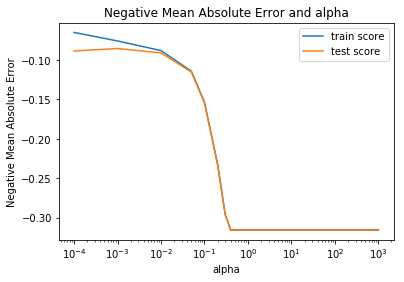

In [227]:
# plotting to get optinum value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xscale('log')
plt.show()

So, 0.001 looks like an optimum value of alpha. Let's take the same.

In [228]:
# Let's try builidng a model with optimal alpha
# lasso regression
lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train, y_train)

# predict
y_train_pred = lm_lasso.predict(X_train)
print("Train r2 score: {0}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("Train mse: {0}".format(mean_squared_error(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lm_lasso.predict(X_test)
print("Test r2 score: {0}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print("Test mse: {0}".format(mean_squared_error(y_true=y_test, y_pred=y_test_pred)))

Train r2 score: 0.9199329844724488
Train mse: 0.013080404500540311
Test r2 score: 0.8867851823158722
Test mse: 0.017039676644653716


In [229]:
# Let's check the lasso model parameters
model_parameters = list(lm_lasso.coef_)
model_parameters.insert(0, lm_lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.869),
 ('MSSubClass', -0.004),
 ('LotFrontage', 0.004),
 ('LotArea', 0.027),
 ('LandSlope', 0.004),
 ('OverallQual', 0.075),
 ('OverallCond', 0.05),
 ('Years_Since_YearBuilt', -0.041),
 ('Years_Since_YearRemodAdd', -0.017),
 ('MasVnrArea', 0.001),
 ('ExterQual', -0.003),
 ('ExterCond', 0.008),
 ('BsmtQual', -0.014),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.003),
 ('BsmtFinType1', -0.008),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', -0.009),
 ('TotalBsmtSF', 0.07),
 ('HeatingQC', -0.014),
 ('CentralAir', 0.018),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.015),
 ('GrLivArea', 0.11),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.013),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.016),
 ('KitchenQual', -0.01),
 ('TotRmsAbvGrd', 0.006),
 ('Fireplaces', 0.013),
 ('FireplaceQu', -0.005),
 ('Years_Since_GarageYrBlt', 0.0),
 ('GarageFinish', -0.004),
 ('GarageCars', 0.024),
 ('GarageArea', 0.011),
 ('GarageQual', 0.007),
 ('G

**Top 15 variables(both positive and negative) affecting the price most.**

In [230]:
# Let's check the top 10 variables having a strong impact on price.

coef_vals=[[i[0],i[1]] for i in zip(X_train.columns,lm_lasso.coef_)]
coef_vals=pd.DataFrame(coef_vals, columns=['Feature', 'Beta Value'])
coef_vals['Absolute Value']=abs(coef_vals['Beta Value'])
coef_vals.sort_values('Absolute Value', ascending=False).head(15)

Feature  Beta Value  Absolute Value
23               GrLivArea    0.109829        0.109829
4              OverallQual    0.075101        0.075101
68    Neighborhood_Crawfor    0.071702        0.071702
18             TotalBsmtSF    0.070243        0.070243
127    Exterior1st_BrkFace    0.066636        0.066636
172         Functional_Typ    0.055938        0.055938
88         Condition1_Norm    0.051331        0.051331
5              OverallCond    0.050415        0.050415
71     Neighborhood_IDOTRR   -0.050388        0.050388
69    Neighborhood_Edwards   -0.049496        0.049496
45             MSZoning_FV    0.047906        0.047906
6    Years_Since_YearBuilt   -0.040830        0.040830
78    Neighborhood_NridgHt    0.036362        0.036362
77    Neighborhood_NoRidge    0.034913        0.034913
83    Neighborhood_Somerst    0.033662        0.033662

In [231]:
# Checking the no of rows and columns
coef_vals.shape # (206, 3)

# Checking the number of variables whose coefficients were reduced to zero by lasso
len(coef_vals[coef_vals['Absolute Value'] == 0.0])

136

#### Final Model : Lasso

As we can see, both Ridge and Lasso have kind of similar top 10 variables which have a greater impact on the SalePrice. But, Lasso looks like a better model as the difference between train and test scores is less here.

* Train R2 score: 0.91
* Test R2 score: 0.88
* Train MSE: 0.013
* Test MSE: 0.017

The top positive variables along with their coefficients are:

1. GrLivArea 0.109829
2. OverallQual 0.075101
3. Neighborhood_Crawfor 0.071702
4. TotalBsmtSF 0.070243
5. Exterior1st_BrkFace 0.066636
6. Functional_Typ 0.055938
7. Condition1_Norm 0.051331
8. OverallCond 0.050415
10. MSZoning_FV 0.047906
11. Neighborhood_NridgHt 0.036362
12. Neighborhood_NoRidge 0.034913
13. Neighborhood_Somerst 0.033662


The top negative variables along with their coefficients are:

1. Neighborhood_IDOTRR -0.050388
2. Neighborhood_Edwards -0.049496
3. Years_Since_YearBuilt -0.040830

Also, lasso managed to remove 136 irrelevant features out of 206 total features.